Imports

In [14]:
# Importando bibliotecas essenciais para análise de dados e machine learning
import pandas as pd  # Manipulação e análise de dados
import numpy as np  # Operações matemáticas e manipulação de arrays

# Visualização de dados
import matplotlib.pyplot as plt  # Criação de gráficos
import seaborn as sns  # Visualização estatística

# Pré-processamento de dados
from sklearn.model_selection import train_test_split  # Divisão de dados em treino e teste
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  # Escalonamento e codificação

# Modelagem e avaliação
from sklearn.linear_model import LinearRegression, LogisticRegression  # Modelos de regressão
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Modelos baseados em árvores
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix  # Métricas de avaliação

from IPython.display import display


'Colunas do DataFrame:'

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_classificacao',
       'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo',
       'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
       'total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista', 'aeronave_matricula',
       'aeronave_operador_categoria', 'aeronave_tipo_veiculo',
       'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao',
       'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd',
       'aeronave_pmd_categoria', 'aeronave_assentos',
       'aeronave_ano_fabricacao', 'aeronave_pais_fabricante',
       'aeronave_pais_registro', 'aeronave_registro_catego

'Tipos de dados de cada coluna:'

codigo_ocorrencia                    int64
codigo_ocorrencia1                   int64
codigo_ocorrencia2                   int64
codigo_ocorrencia3                   int64
codigo_ocorrencia4                   int64
ocorrencia_classificacao            object
ocorrencia_latitude                 object
ocorrencia_longitude                object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_pais                     object
ocorrencia_aerodromo                object
ocorrencia_dia                      object
ocorrencia_hora                     object
investigacao_aeronave_liberada      object
investigacao_status                 object
divulgacao_relatorio_numero         object
divulgacao_relatorio_publicado      object
divulgacao_dia_publicacao           object
total_recomendacoes                  int64
total_aeronaves_envolvidas           int64
ocorrencia_saida_pista              object
aeronave_matricula                  object
aeronave_op

'Quantidade de valores nulos por coluna:'

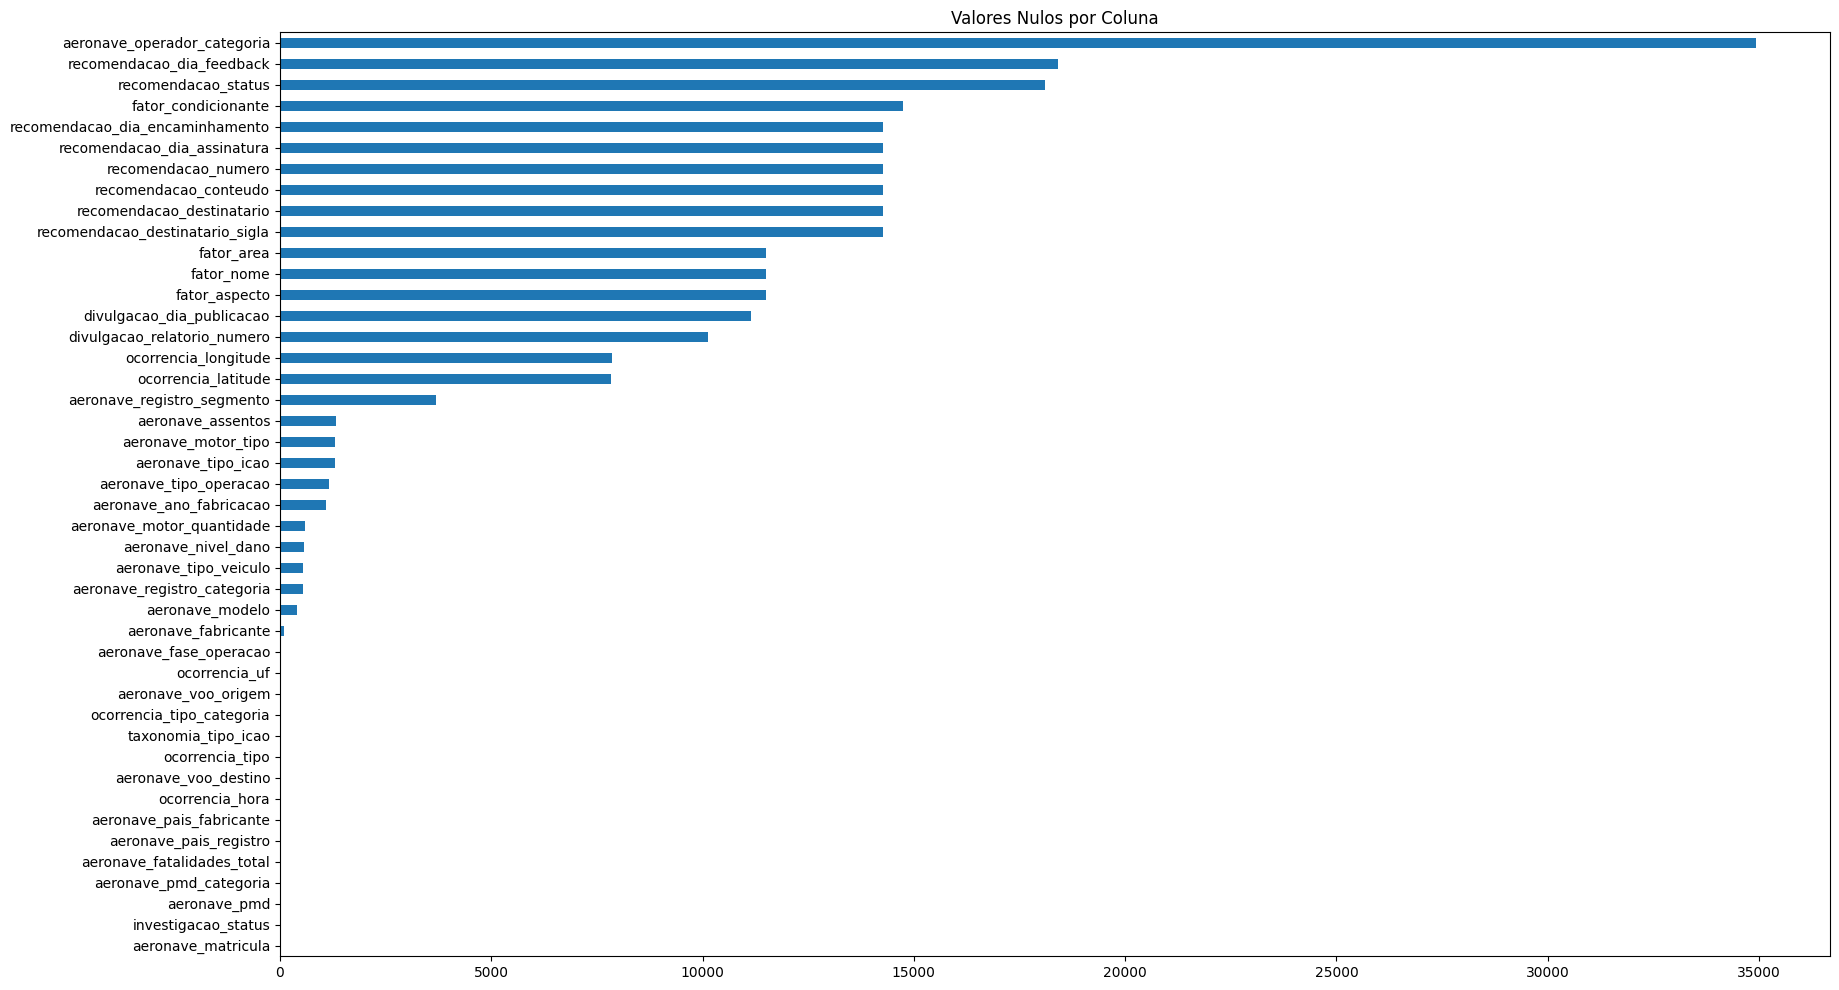

'valores unicos por coluna:'

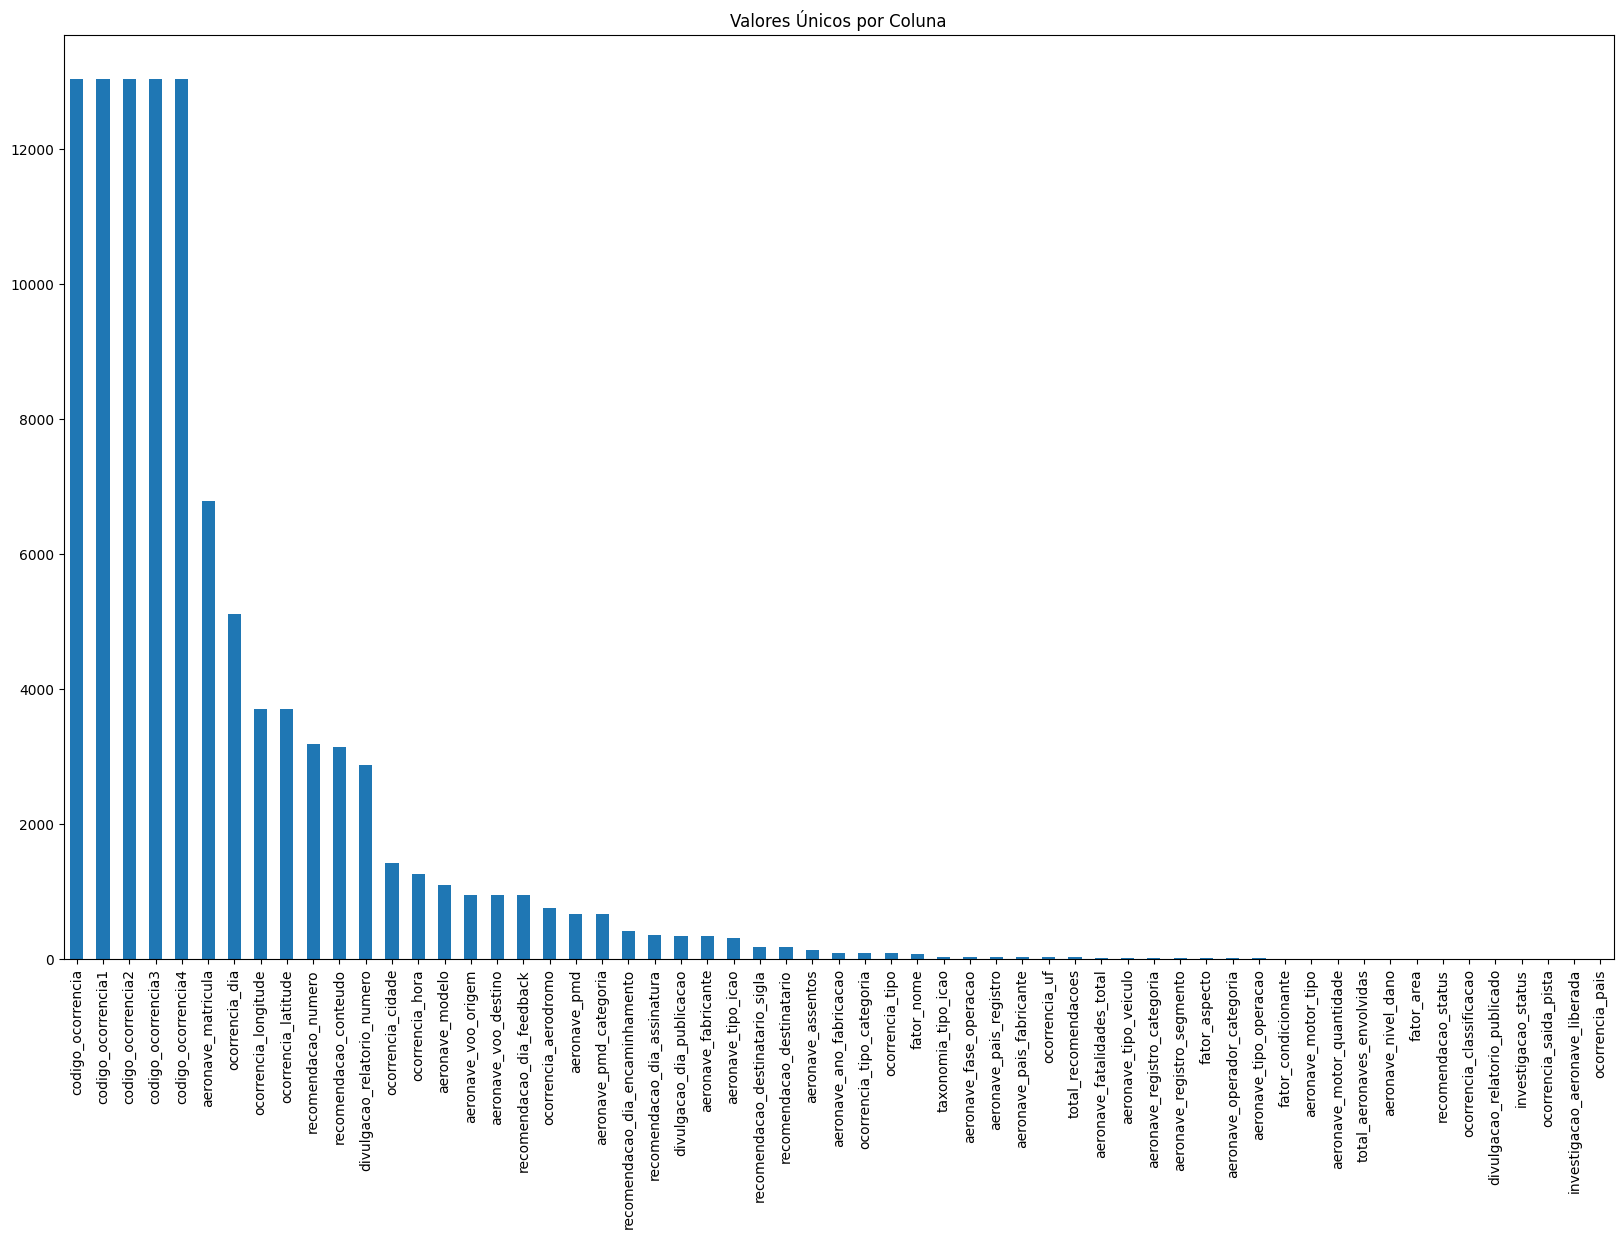

In [15]:
df_aeronave = pd.read_csv("aeronave.csv", encoding='latin1', sep=';')
df_fator = pd.read_csv("fator_contribuinte.csv", encoding='latin1', sep=';')
df_recomendacao = pd.read_csv("recomendacao.csv", encoding='latin1', sep=';')
df_tipo = pd.read_csv("ocorrencia_tipo.csv", encoding='latin1', sep=';')
df_ocorrencia = pd.read_csv("ocorrencia.csv", encoding='latin1', sep=';')

df_merged = df_ocorrencia.merge(df_aeronave, on='codigo_ocorrencia2', how='left')
df_merged = df_merged.merge(df_fator, on='codigo_ocorrencia3', how='left')
df_merged = df_merged.merge(df_recomendacao, on='codigo_ocorrencia4', how='left')
df_merged = df_merged.merge(df_tipo, on='codigo_ocorrencia1', how='left')

display("Colunas do DataFrame:")
display(df_merged.columns)

display("Tipos de dados de cada coluna:")
display(df_merged.dtypes)

display("Quantidade de valores nulos por coluna:")
df_merged.replace("***", np.nan, inplace=True)
nulos_por_coluna = df_merged.isnull().sum()
nulos_por_coluna = nulos_por_coluna[nulos_por_coluna > 0]  # Filtrar apenas colunas com valores nulos
nulos_por_coluna.sort_values().plot(kind='barh', figsize=(20, 12), title='Valores Nulos por Coluna')
plt.show()
display("valores unicos por coluna:")
df_merged.nunique().sort_values(ascending=False).plot(kind='bar', figsize=(20,12), title='Valores Únicos por Coluna')
plt.show()


Ocorrencias por Estado

<Axes: title={'center': 'Ocorrências por Estado'}, xlabel='Estado', ylabel='Quantidade de Ocorrências'>

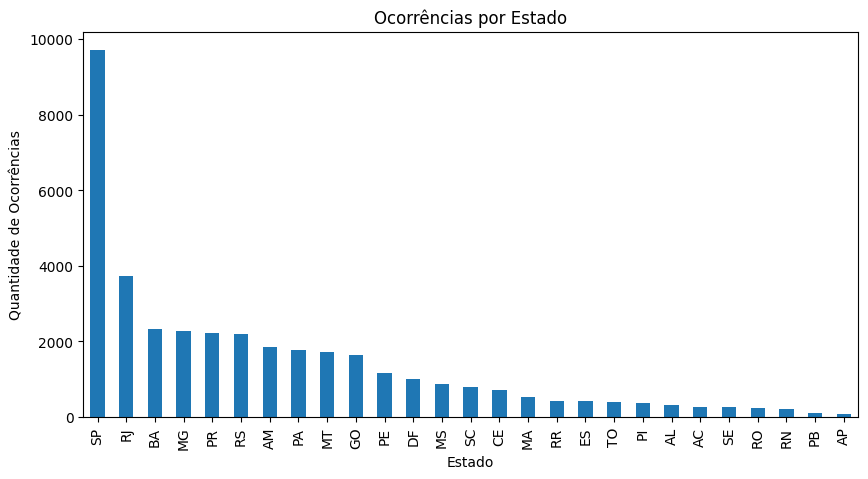

In [16]:
df_merged['ocorrencia_uf'].value_counts().plot(kind='bar', title='Ocorrências por Estado', xlabel='Estado', ylabel='Quantidade de Ocorrências',figsize=(10, 5))


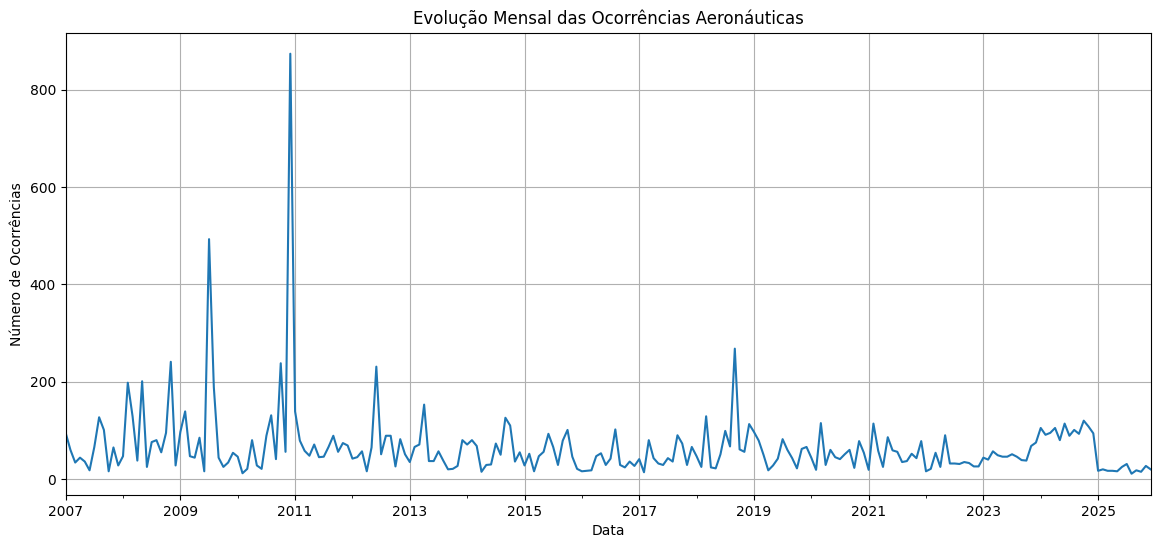

In [27]:
df_merged['ocorrencia_dia'] = pd.to_datetime(df_merged['ocorrencia_dia'], errors='coerce')

plt.figure(figsize=(14, 6))
df_merged.set_index('ocorrencia_dia').resample('ME').size().plot()
plt.title('Evolução Mensal das Ocorrências Aeronáuticas')
plt.xlabel('Data')
plt.ylabel('Número de Ocorrências')
plt.grid()
plt.show()

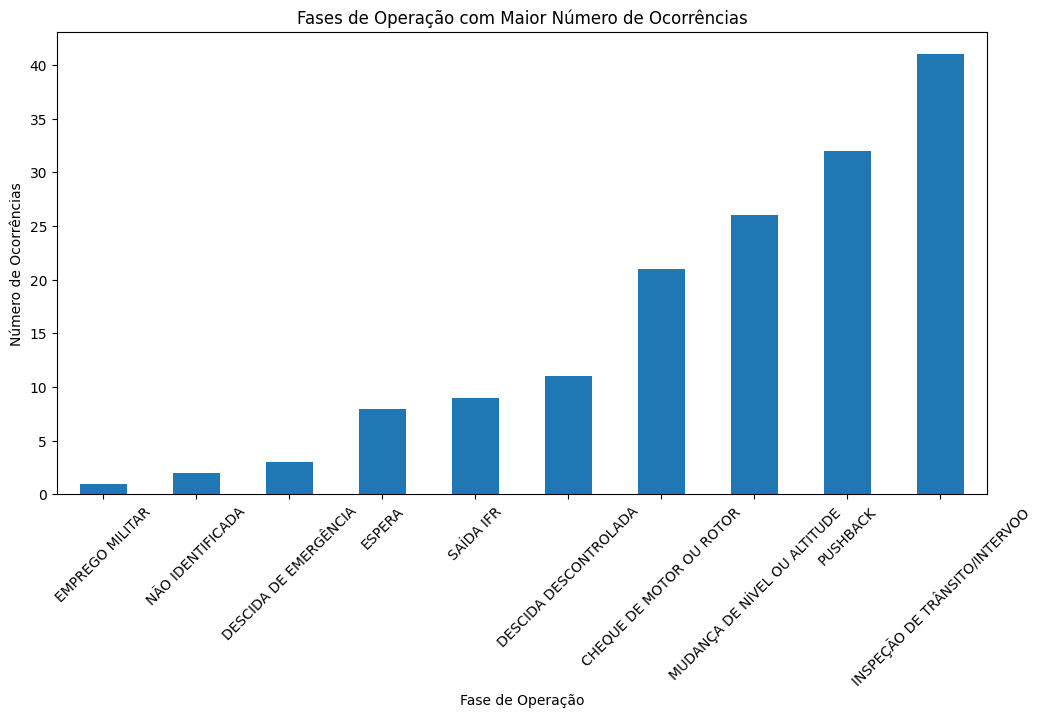

In [18]:
plt.figure(figsize=(12, 6))
df_merged['aeronave_fase_operacao'].value_counts().sort_values().head(10).plot(kind='bar')
plt.title('Fases de Operação com Maior Número de Ocorrências')
plt.xlabel('Fase de Operação')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.show()

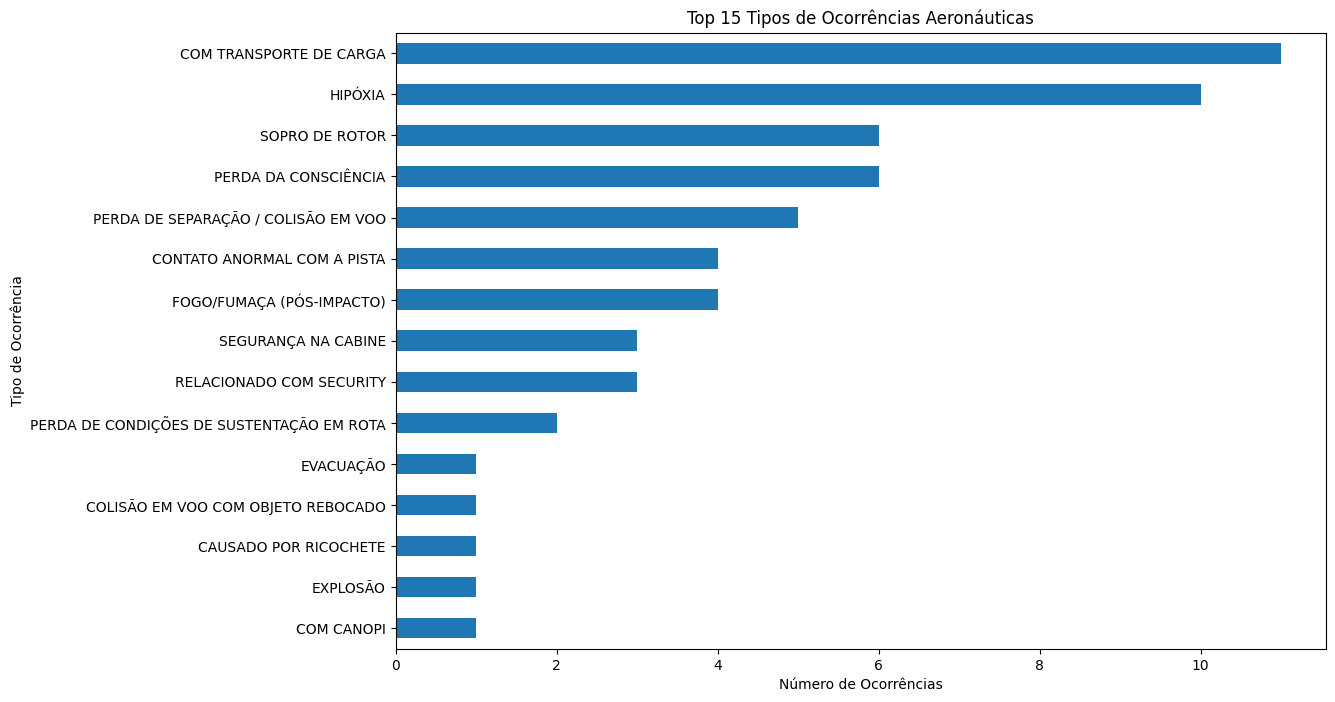

In [19]:
plt.figure(figsize=(12, 8))
df_merged['ocorrencia_tipo'].value_counts(ascending=True).head(15).plot(kind='barh')
plt.title('Top 15 Tipos de Ocorrências Aeronáuticas')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Tipo de Ocorrência')
plt.show()

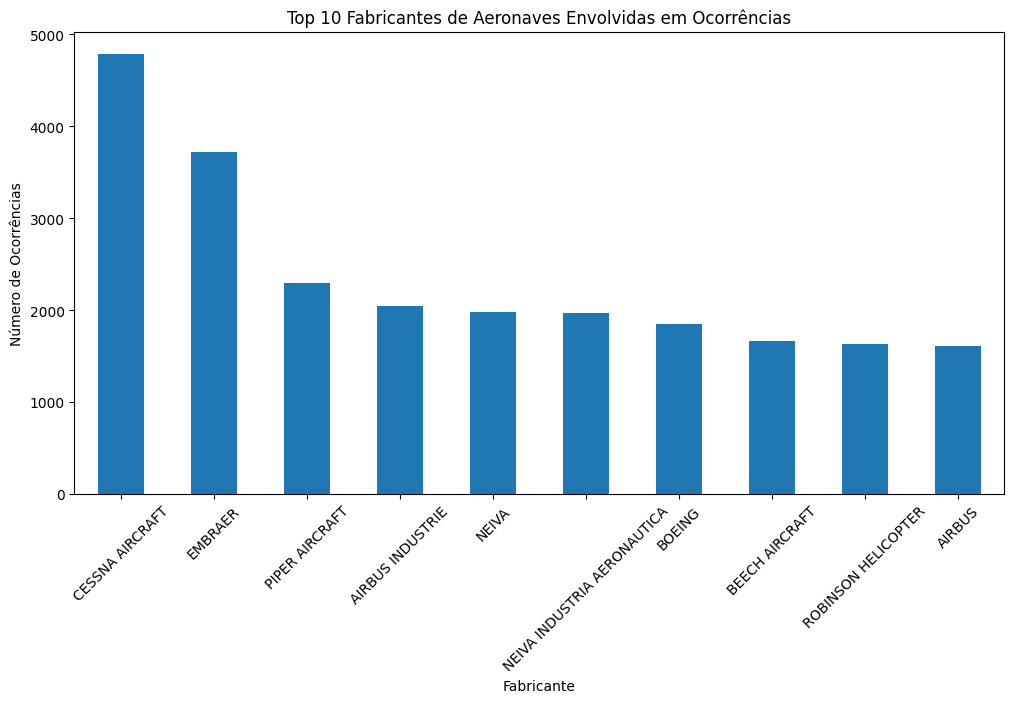

In [20]:
plt.figure(figsize=(12, 6))
df_merged['aeronave_fabricante'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Fabricantes de Aeronaves Envolvidas em Ocorrências')
plt.xlabel('Fabricante')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.show()

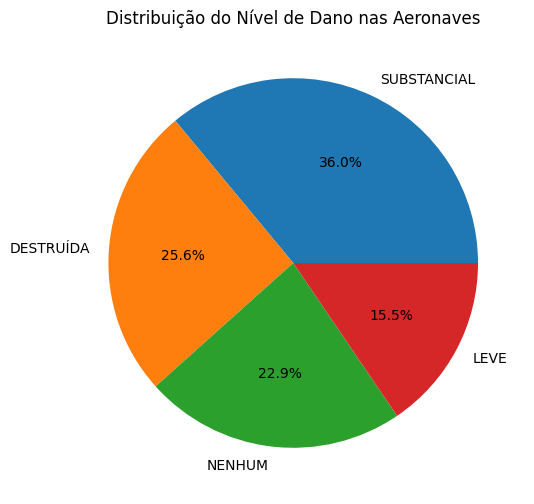

In [21]:
plt.figure(figsize=(10, 6))
df_merged['aeronave_nivel_dano'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição do Nível de Dano nas Aeronaves')
plt.ylabel('')
plt.show()

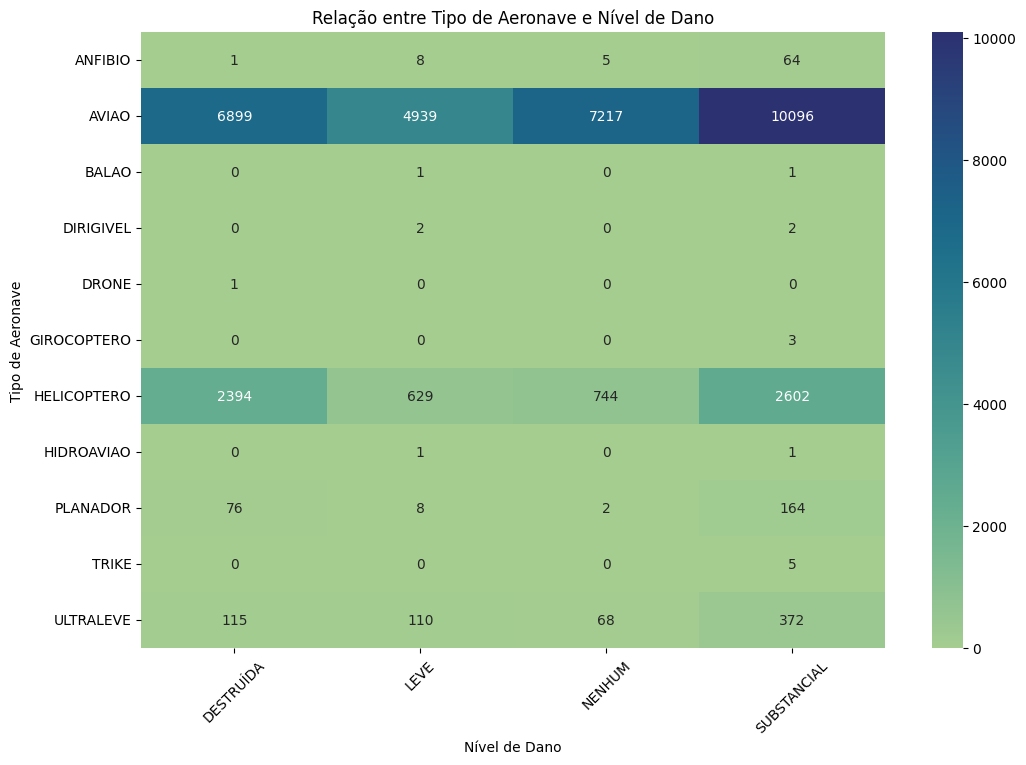

In [26]:

import unicodedata


def normalizar_texto(texto):
    if isinstance(texto, str):
        texto = texto.strip().upper()
        texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')
        return texto
    else:
        return texto  # Retorna como está se não for string (ex: NaN)

df_merged['aeronave_tipo_veiculo'] = df_merged['aeronave_tipo_veiculo'].apply(normalizar_texto)
plt.figure(figsize=(12, 8))
cross_tab = pd.crosstab(df_merged['aeronave_tipo_veiculo'], df_merged['aeronave_nivel_dano'])
sns.heatmap(cross_tab, cmap='crest', annot=True, fmt='d')
plt.title('Relação entre Tipo de Aeronave e Nível de Dano')
plt.xlabel('Nível de Dano')
plt.ylabel('Tipo de Aeronave')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


idade_aeronave
Velho (<1990)                15795
Intermediário (1990-2009)    14975
Novo (2010+)                  5790
Name: count, dtype: int64


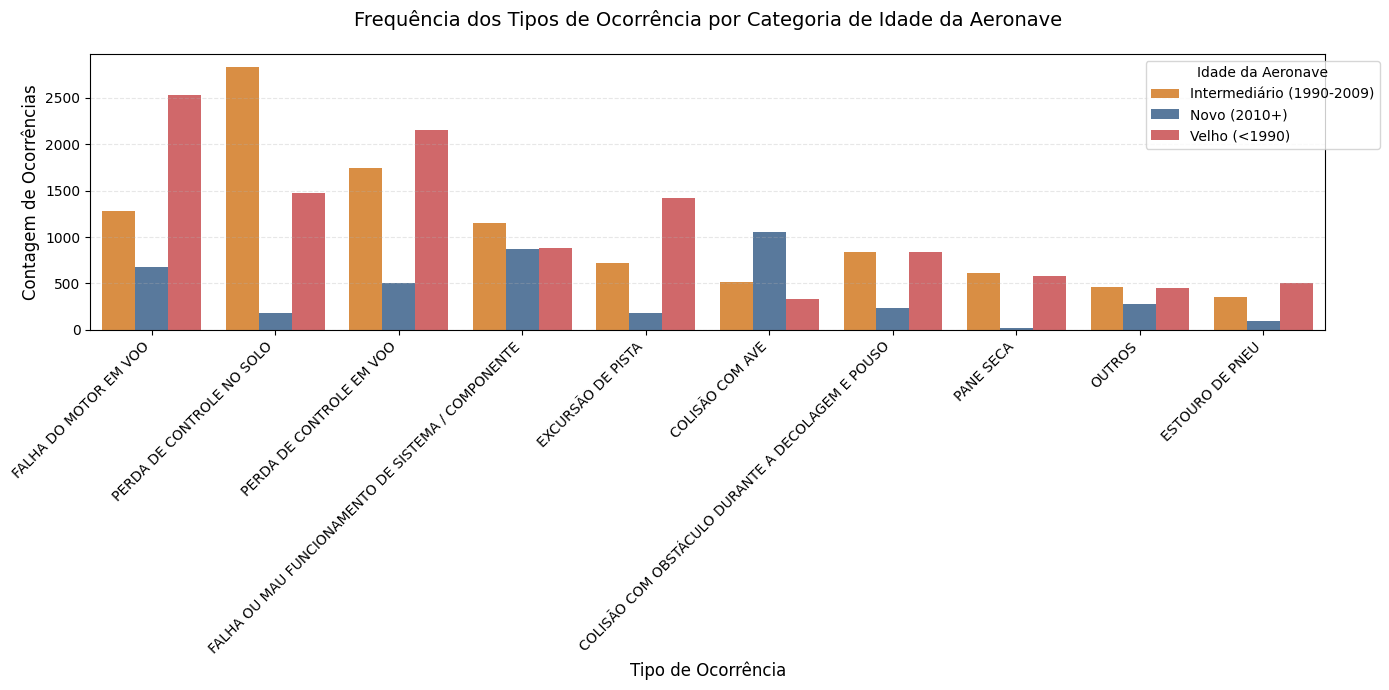

In [23]:

# Criar categorias baseadas no ano de fabricação
def categorizar_idade(ano):
    if pd.isna(ano):
        return None
    ano = int(ano)
    if ano >= 2010:
        return 'Novo (2010+)'
    elif ano >= 1990:
        return 'Intermediário (1990-2009)'
    else:
        return 'Velho (<1990)'

# Aplicar a categorização
df_merged['idade_aeronave'] = df_merged['aeronave_ano_fabricacao'].apply(categorizar_idade)

# Verificar a distribuição
print(df_merged['idade_aeronave'].value_counts())

# Filtrar os 5 tipos mais comuns de ocorrência
top_5_ocorrencias = df_merged['ocorrencia_tipo'].value_counts().head(10).index
df_top = df_merged[df_merged['ocorrencia_tipo'].isin(top_5_ocorrencias)].dropna(subset=['idade_aeronave'])

# Configurar o gráfico
plt.figure(figsize=(14, 7))
sns.countplot(data=df_top, 
              x='ocorrencia_tipo', 
              hue='idade_aeronave',
              palette={'Novo (2010+)': '#4e79a7', 
                       'Intermediário (1990-2009)': '#f28e2b', 
                       'Velho (<1990)': '#e15759'},
              order=top_5_ocorrencias)

# Ajustes estéticos
plt.title('Frequência dos Tipos de Ocorrência por Categoria de Idade da Aeronave', pad=20, fontsize=14)
plt.xlabel('Tipo de Ocorrência', fontsize=12)
plt.ylabel('Contagem de Ocorrências', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Idade da Aeronave', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()